**Problem with vanishing gradient descent**



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Build a deep model with sigmoid activation and poor initialization
def create_vanishing_model():
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(784,)))

    # Deep layers with sigmoid activation and default initialization (can cause vanishing gradients)
    for _ in range(10):
        model.add(keras.layers.Dense(32, activation='sigmoid'))

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# Compile model
vanishing_model = create_vanishing_model()
vanishing_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
print("Training model with sigmoid (vanishing gradient issue)...")
history_vanishing = vanishing_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training model with sigmoid (vanishing gradient issue)...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1016 - loss: 2.3309 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.

**Solution Using ReLU + He initialization for Relu for normalization + Xavier**

In [2]:
# Build a corrected deep model using ReLU + He initialization
def create_solved_model():
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(784,)))

    # Use He initialization (recommended for ReLU)
    initializer = keras.initializers.HeNormal()  # He initialization

    for _ in range(10):
        model.add(keras.layers.Dense(
            32,
            activation='relu',
            kernel_initializer=initializer   # He init for ReLU
        ))

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# Create and compile the fixed model
solved_model = create_solved_model()
solved_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
print("\nTraining model with ReLU + He initialization (fixed)...")
history_solved = solved_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)


Training model with ReLU + He initialization (fixed)...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4684 - loss: 1.5449 - val_accuracy: 0.8417 - val_loss: 0.5246
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8791 - loss: 0.4113 - val_accuracy: 0.9045 - val_loss: 0.3278
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9141 - loss: 0.2938 - val_accuracy: 0.9210 - val_loss: 0.2684
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9274 - loss: 0.2457 - val_accuracy: 0.9332 - val_loss: 0.2281
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9366 - loss: 0.2159 - val_accuracy: 0.9366 - val_loss: 0.2106
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1949 - val_accuracy: 0.9406 - val_loss: 0.1970
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9473 - loss: 0.1789 - val_accuracy: 0.9425 - val_loss: 0.1910
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/

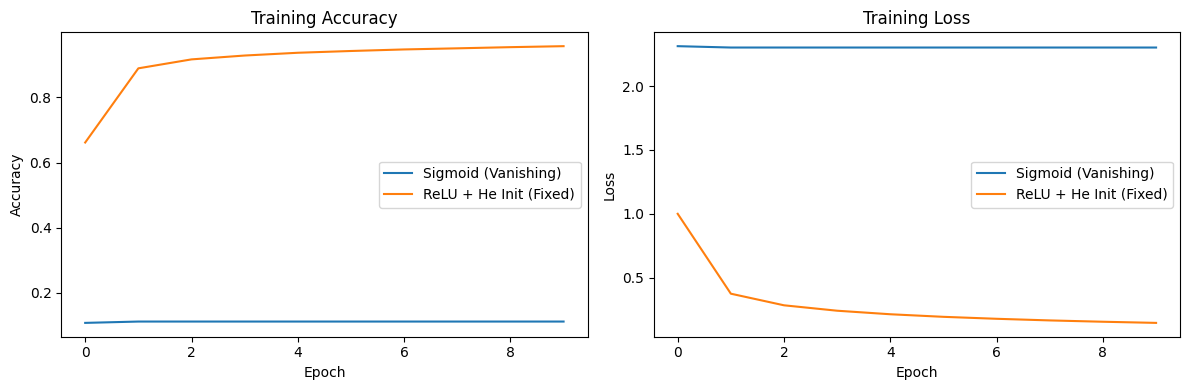

In [3]:
# Plot accuracy comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_vanishing.history['accuracy'], label='Sigmoid (Vanishing)')
plt.plot(history_solved.history['accuracy'], label='ReLU + He Init (Fixed)')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vanishing.history['loss'], label='Sigmoid (Vanishing)')
plt.plot(history_solved.history['loss'], label='ReLU + He Init (Fixed)')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()